In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Data

In [2]:
zoo = pd.read_csv("C:\\Users\\Swathi\\Desktop\\Excelr Classes\\Assignments\\10.KNN\\Zoo.csv")
zoo.head()
# zoo.shape


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# Split dataset into Train and Test 

In [3]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(zoo,test_size=0.2)

# import KNN module

In [4]:
from sklearn.neighbors import KNeighborsClassifier as KNC

# Identify value of 'K'

In [5]:
accuracy = []

for i in range(3,26,2):
    neighbours = KNC(n_neighbors=i)
    neighbours.fit(train.iloc[:,1:17],train.iloc[:,17])
    train_accuracy = np.mean(neighbours.predict(train.iloc[:,1:17]) == train.iloc[:,17])
    test_accuracy = np.mean(neighbours.predict(test.iloc[:,1:17]) == test.iloc[:,17])
    accuracy.append([train_accuracy,test_accuracy])

print(accuracy)
print(len(accuracy))

[[0.975, 0.8571428571428571], [0.9375, 0.8571428571428571], [0.925, 0.8571428571428571], [0.8625, 0.8095238095238095], [0.8125, 0.8095238095238095], [0.775, 0.7142857142857143], [0.775, 0.7142857142857143], [0.775, 0.7142857142857143], [0.775, 0.8095238095238095], [0.775, 0.8095238095238095], [0.7, 0.7142857142857143], [0.7, 0.7142857142857143]]
12


# visualize obtained 'k' value on chart

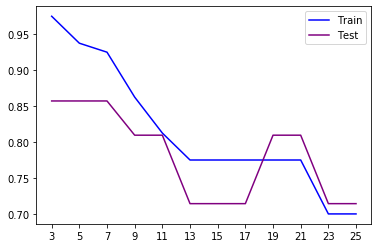

In [6]:
plt.plot(np.arange(3,26,2), [i[0] for i in accuracy], "blue")
plt.plot(np.arange(3,26,2), [i[1] for i in accuracy], "purple")
plt.legend(["Train","Test"])
plt.xticks(np.arange(3,26,2))
plt.show()

# Examine model when K = 3

In [7]:
neighbours = KNC(n_neighbors=3)
neighbours.fit(train.iloc[:,1:17],train.iloc[:,17])
train_accuracy = np.mean(neighbours.predict(train.iloc[:,1:17]) == train.iloc[:,17])
test_accuracy = np.mean(neighbours.predict(test.iloc[:,1:17]) == test.iloc[:,17])
print("K=3 : ",train_accuracy,test_accuracy)

K=3 :  0.975 0.8571428571428571


# Examine model when K = 5


In [8]:
neighbours = KNC(n_neighbors=5)
neighbours.fit(train.iloc[:,1:17],train.iloc[:,17])
train_accuracy = np.mean(neighbours.predict(train.iloc[:,1:17]) == train.iloc[:,17])
test_accuracy = np.mean(neighbours.predict(test.iloc[:,1:17]) == test.iloc[:,17])
print("K=5 : ",train_accuracy,test_accuracy)

K=5 :  0.9375 0.8571428571428571


In [9]:
# k=3 gives acuuracy value

#  confusion matrix & classification report

In [10]:
x_train=train.iloc[:,1:17]
y_train=train.iloc[:,17]

x_test=test.iloc[:,1:17]
y_test=test.iloc[:,17]


In [11]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix


#let us get the predictions using the classifier we had fit above
y_pred = neighbours.predict(x_test)

In [12]:
confusion_matrix(y_test,y_pred)

array([[8, 0, 2, 0, 0],
       [0, 4, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 1, 1]], dtype=int64)

In [13]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.80      0.89        10
           2       1.00      1.00      1.00         4
           4       0.60      1.00      0.75         3
           6       0.67      1.00      0.80         2
           7       1.00      0.50      0.67         2

    accuracy                           0.86        21
   macro avg       0.85      0.86      0.82        21
weighted avg       0.91      0.86      0.86        21

